In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
# se eliminan valores atipicos
# eliminamos la direccion del viento como variable, no aporta mayor informacion
# se normaliza el data set con MinMaxScaler
# se visualizan y se guardan resultados obtenidos


In [100]:
DataSet = pd.read_csv('../../data/processed/Dataset_Particulas_contaminantes.csv',sep=';', decimal=',')
DataSet['fecha'] = pd.to_datetime(DataSet['fecha'])

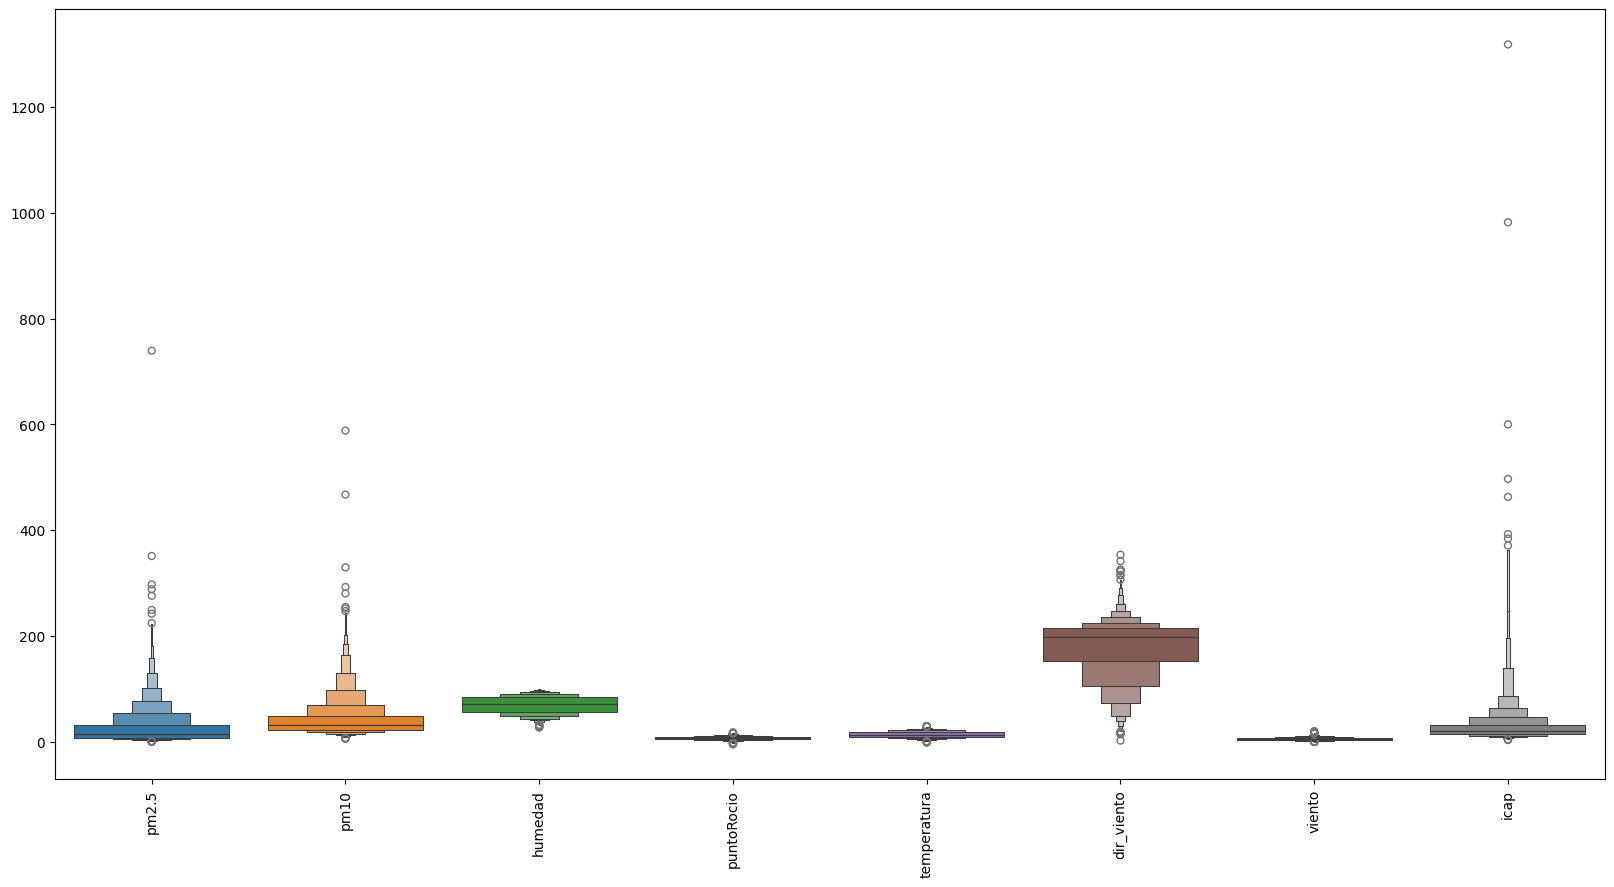

In [101]:
features = DataSet.drop(['fecha'], axis=1)
plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
sns.color_palette("rocket", as_cmap=True)
plt.xticks(rotation=90)
plt.show()

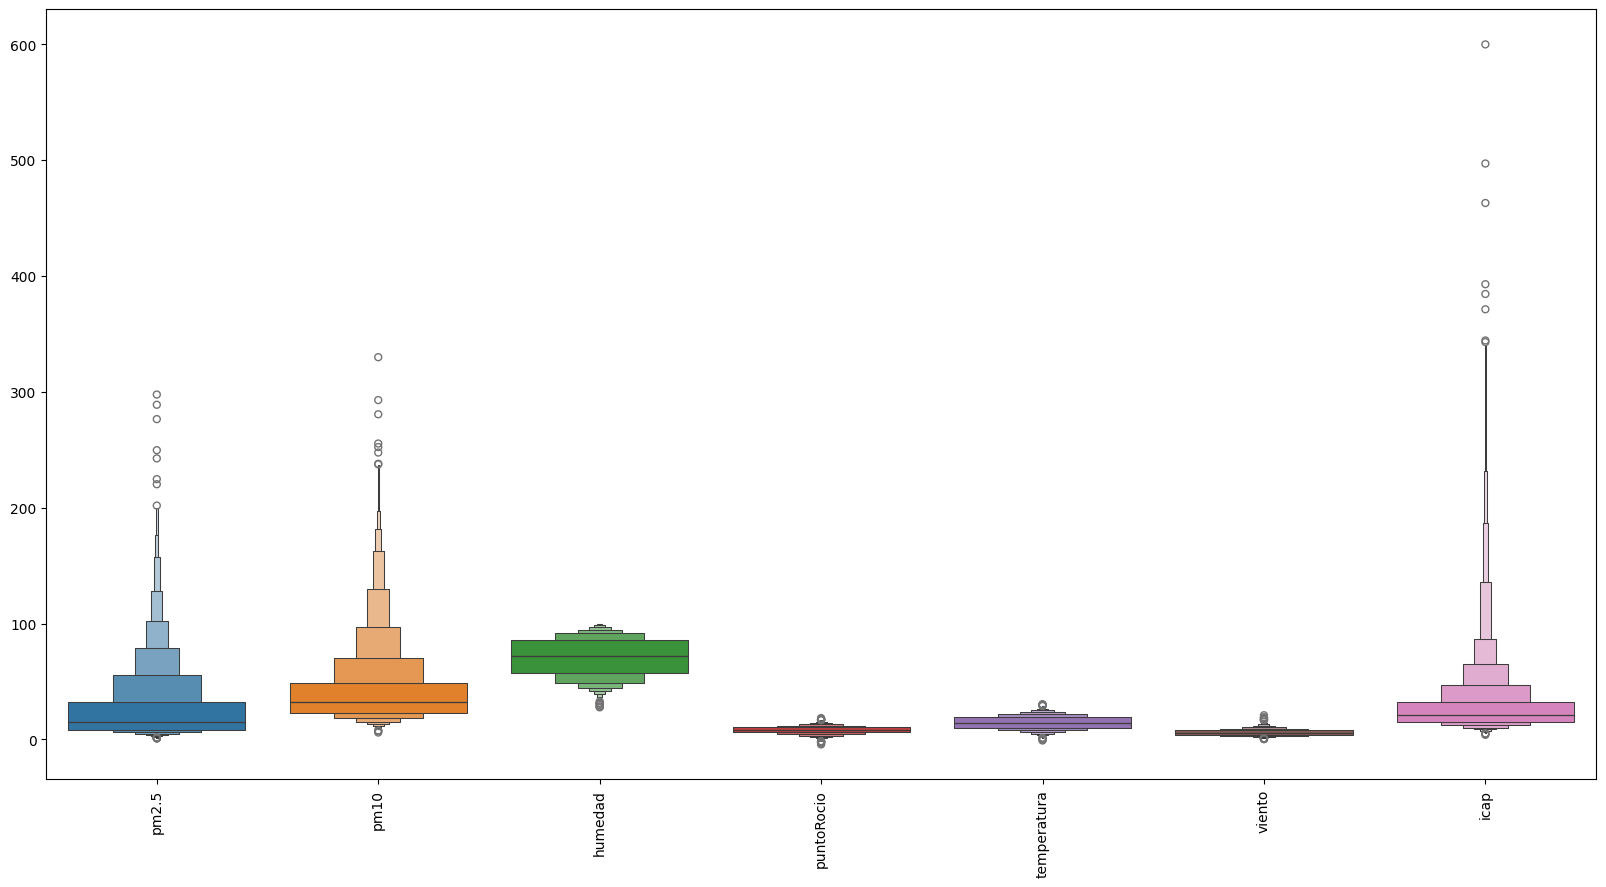

In [102]:
# eliminar valores atipicos antes de normalizar
DataSet = DataSet[DataSet['pm2.5'] < 400]
DataSet = DataSet[DataSet['pm10'] < 400]

# Creando una columna para el año para que se normalice 
DataSet['year'] = DataSet.fecha.dt.year

# eliminamos la direccion del viento como variable, no aporta mayor informacion
DataSet = DataSet.drop('dir_viento',axis=1)

features = DataSet.drop(['fecha','year'], axis=1)
plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
sns.color_palette("rocket", as_cmap=True)
plt.xticks(rotation=90)
plt.show()


In [103]:
data_MinMaxScaler = DataSet.copy()
# columnas numericas
cols = data_MinMaxScaler.select_dtypes(include=[float, int]).columns.tolist()

# Crea el escalador
scaler_minmax = MinMaxScaler()

# Ajusta el escalador solo en las columnas numéricas y transforma
data_MinMaxScaler[cols] = scaler_minmax.fit_transform(data_MinMaxScaler[cols])


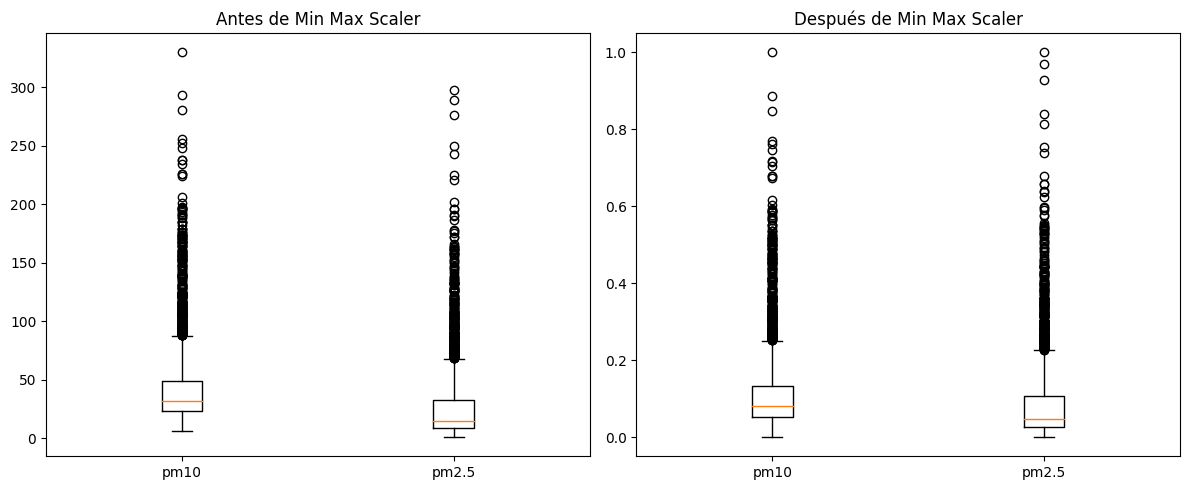

In [104]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot([DataSet['pm10'], DataSet['pm2.5']])
plt.title('Antes de Min Max Scaler')
plt.xticks([1, 2], ['pm10', 'pm2.5'])

plt.subplot(1, 2, 2)
plt.boxplot([data_MinMaxScaler['pm10'], data_MinMaxScaler['pm2.5']])
plt.title('Después de Min Max Scaler')
plt.xticks([1, 2], ['pm10', 'pm2.5'])

plt.tight_layout()

# Guardar la imagen
ruta_guardado = './imagenes/normalizacion_MinMax.png'  # Reemplaza con tu ruta
plt.savefig(ruta_guardado, format='png', dpi=300)

plt.show()


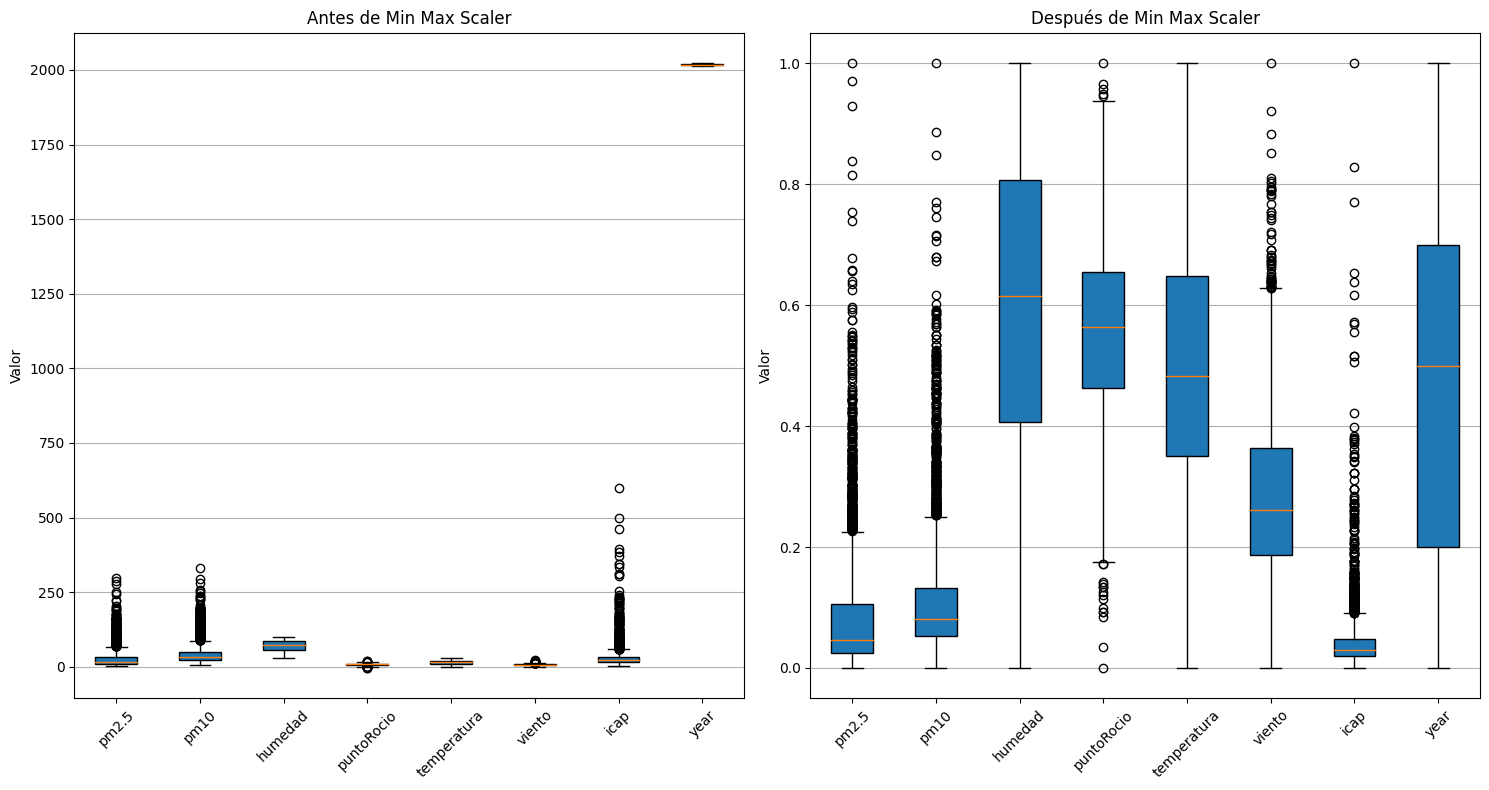

In [105]:
cols_numericas = data_MinMaxScaler.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 8))

# Subplot 1: Antes de Min Max Scaler
plt.subplot(1, 2, 1)
plt.boxplot([DataSet[col] for col in cols_numericas], vert=True, patch_artist=True) # añade vert=True para gráficos verticales, patch_artist=True para relleno
plt.title('Antes de Min Max Scaler')
plt.xticks(range(1, len(cols_numericas) + 1), cols_numericas, rotation=45) # Para rotar los nombres para mejor lectura
plt.ylabel('Valor')  # Etiqueta para el eje y
plt.grid(axis='y')

# Subplot 2: Después de Min Max Scaler
plt.subplot(1, 2, 2)
plt.boxplot([data_MinMaxScaler[col] for col in cols_numericas], vert=True, patch_artist=True)
plt.title('Después de Min Max Scaler')
plt.xticks(range(1, len(cols_numericas) + 1), cols_numericas, rotation=45) 
plt.ylabel('Valor')
plt.grid(axis='y')

plt.tight_layout()

# Guardar la imagen
ruta_guardado = './imagenes/normalizacion_MinMax_all.png'  # Reemplaza con tu ruta
plt.savefig(ruta_guardado, format='png', dpi=300)

plt.show()

In [106]:
# Asegurándonos de que los datos en la columna 'fecha' están en formato datetime
data_MinMaxScaler['fecha'] = pd.to_datetime(data_MinMaxScaler["fecha"])

# Función para codificar datetime en parámetros cíclicos
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

# Creando una columna para el mes y codificándola
data_MinMaxScaler ['mes'] = data_MinMaxScaler.fecha.dt.month
data_MinMaxScaler = encode(data_MinMaxScaler, 'mes', 12)

# Creando una columna para el día y codificándola
data_MinMaxScaler['dia'] = data_MinMaxScaler.fecha.dt.day
data_MinMaxScaler = encode(data_MinMaxScaler, 'dia', 31)

# # Mostrando las primeras filas del dataframe
# data_set_contaminantes.head()

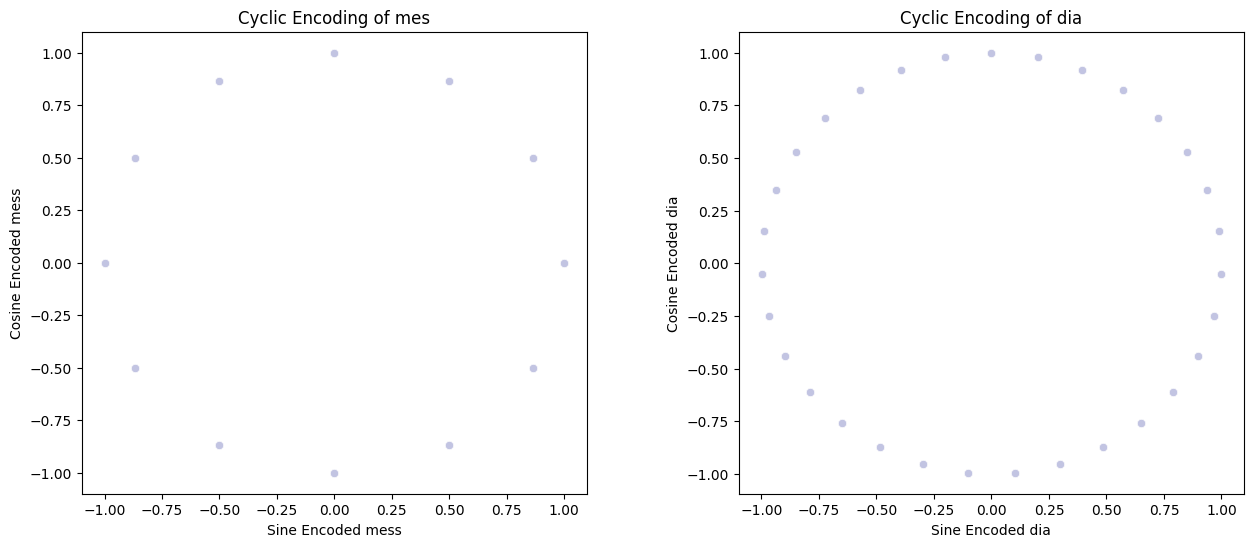

In [107]:
# Crear una figura y un conjunto de subtramas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas de subtramas

# Gráfico 1: Meses

sns.scatterplot(x="mes_sin", y="mes_cos", data=data_MinMaxScaler, color="#C2C4E2", ax=axes[0])
axes[0].set_title("Cyclic Encoding of mes")
axes[0].set_ylabel("Cosine Encoded mess")
axes[0].set_xlabel("Sine Encoded mess")

# Gráfico 2: Días
sns.scatterplot(x='dia_sin', y='dia_cos', data=data_MinMaxScaler, color="#C2C4E2", ax=axes[1])
axes[1].set_title("Cyclic Encoding of dia")
axes[1].set_ylabel("Cosine Encoded dia")
axes[1].set_xlabel("Sine Encoded dia")

# Ajustar el espacio entre los dos subgráficos
plt.subplots_adjust(wspace=0.3)

plt.show()

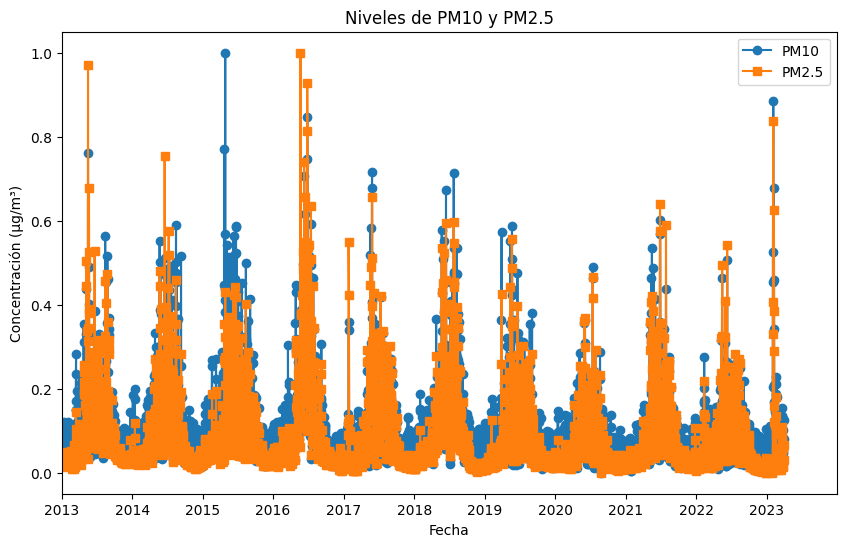

In [108]:
fecha = data_MinMaxScaler['fecha']
pm10 = data_MinMaxScaler['pm10']
pm25= data_MinMaxScaler['pm2.5']

# Graficar los datos
plt.figure(figsize=(10,6))
plt.plot(fecha, pm10, label='PM10', marker='o')
plt.plot(fecha, pm25, label='PM2.5', marker='s')

plt.title('Niveles de PM10 y PM2.5')
plt.xlabel('Fecha')
plt.ylabel('Concentración (µg/m³)')
plt.legend()

# Configurar el formato y la ubicación de las marcas del eje x
ax = plt.gca()  # Obtener el eje actual
ax.xaxis.set_major_locator(mdates.YearLocator())  # Ubicar una marca por año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatear las marcas como 'YYYY'

# Establecer los límites del eje x
plt.xlim([pd.Timestamp('2013-01-01'), pd.Timestamp('2023-12-31')])

# Guardar la imagen
ruta_guardado = './imagenes/niveles_contaminantes_anuales_MinMax_normalizados.png'  # Reemplaza con tu ruta
plt.savefig(ruta_guardado, format='png', dpi=300)


plt.show()



In [109]:
path = '../../data/processed/normalizados/Dataset_MinMax.csv'
data_MinMaxScaler.to_csv(path, sep=';',index=False, float_format='%.4f', decimal=',')